In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

In [2]:
train = pd.read_csv('../datasets/train.csv')

In [3]:
weather = pd.read_csv('../datasets/weather.csv')

In [4]:
# convert dates to date time
train['Date'] = pd.to_datetime(train['Date'])
weather['Date'] = pd.to_datetime(weather['Date'])

In [5]:
# convert to numeric
train['Longitude'] = pd.to_numeric(train['Longitude'])
train['Latitude'] = pd.to_numeric(train['Latitude'])
train['NumMosquitos'] = pd.to_numeric(train['NumMosquitos'])

In [6]:
train.dtypes

Date                      datetime64[ns]
Address                           object
Species                           object
Block                              int64
Street                            object
Trap                              object
AddressNumberAndStreet            object
Latitude                         float64
Longitude                        float64
AddressAccuracy                    int64
NumMosquitos                       int64
WnvPresent                         int64
dtype: object

In [7]:
# make date weather index
weather.set_index('Date', inplace=True)

In [8]:
# filter for station 1
mask = (weather['Station'] == 1)
weather1 = weather[mask]

In [9]:
precip = weather1['PrecipTotal'].replace('  T', '0.0')

In [10]:
precip_list = []
for i in weather1['PrecipTotal']:
    if i != '  T':
        precip_list.append(float(i))
    else:
        precip_list.append(float('0.0'))

In [11]:
weather_subset = pd.DataFrame(columns = ['Date','total_precip'])

In [12]:
weather_subset.head()

Empty DataFrame
Columns: [Date, total_precip]
Index: []

In [13]:
weather_subset['total_precip']  = precip_list
weather_subset['Date'] = weather1.index

In [14]:
weather_subset.set_index('Date', inplace=True)

In [15]:
weekly_precip = weather_subset.resample('W').mean()

In [16]:
weekly_precip.head()

total_precip
Date                    
2007-05-06      0.000000
2007-05-13      0.018571
2007-05-20      0.084286
2007-05-27      0.152857
2007-06-03      0.035714

In [17]:
weekly_df = pd.DataFrame(columns = ['Date', 'PavgW'])
weekly_df['Date'] = weekly_precip.index
weekly_df['PavgW'] = weekly_precip.values

In [18]:
weekly_df.head()

Date     PavgW
0 2007-05-06  0.000000
1 2007-05-13  0.018571
2 2007-05-20  0.084286
3 2007-05-27  0.152857
4 2007-06-03  0.035714

In [19]:
end = max(weather1.index)
start = min(weather1.index)
new_df = pd.DataFrame(columns = ['Date'])
new_df['Date'] = pd.bdate_range(start, end, freq = 'D')

In [20]:
precip = new_df.merge(weekly_df, on = 'Date', how = 'left')

In [21]:
precip = precip.fillna(method = 'bfill', limit = 6)

In [22]:
precip.head()

Date  PavgW
0 2007-05-01    0.0
1 2007-05-02    0.0
2 2007-05-03    0.0
3 2007-05-04    0.0
4 2007-05-05    0.0

In [23]:
# merge precip with train
train = train.merge(precip, on = 'Date', how = 'left')

In [24]:
train.head()

Date                                            Address  \
0 2007-05-29  4100 North Oak Park Avenue, Chicago, IL 60634,...   
1 2007-05-29  4100 North Oak Park Avenue, Chicago, IL 60634,...   
2 2007-05-29  6200 North Mandell Avenue, Chicago, IL 60646, USA   
3 2007-05-29    7900 West Foster Avenue, Chicago, IL 60656, USA   
4 2007-05-29    7900 West Foster Avenue, Chicago, IL 60656, USA   

                  Species  Block           Street  Trap  \
0  CULEX PIPIENS/RESTUANS     41   N OAK PARK AVE  T002   
1          CULEX RESTUANS     41   N OAK PARK AVE  T002   
2          CULEX RESTUANS     62    N MANDELL AVE  T007   
3  CULEX PIPIENS/RESTUANS     79     W FOSTER AVE  T015   
4          CULEX RESTUANS     79     W FOSTER AVE  T015   

              AddressNumberAndStreet   Latitude  Longitude  AddressAccuracy  \
0  4100  N OAK PARK AVE, Chicago, IL  41.954690 -87.800991                9   
1  4100  N OAK PARK AVE, Chicago, IL  41.954690 -87.800991                9   
2   6200  N MANDELL AVE, Chicago, IL  41.994991 -87.769279                9   
3    7900  W FOSTER AVE, Chicago, IL  41.974089 -87.824812                8   
4    7900  W FOSTER AVE, Chicago, IL  41.974089 -87.824812                8   

   NumMosquitos  WnvPresent     PavgW  
0             1           0  0.035714  
1             1           0  0.035714  
2             1           0  0.035714  
3             1           0  0.035714  
4             4           0  0.035714

# Getting Avg Temp

In [25]:
# resample 
weekly_weather = weather1.Tmax.resample('W').mean()


In [26]:
weather1.head()

Station  Tmax  Tmin Tavg Depart  DewPoint WetBulb Heat Cool  \
Date                                                                      
2007-05-01        1    83    50   67     14        51      56    0    2   
2007-05-02        1    59    42   51     -3        42      47   14    0   
2007-05-03        1    66    46   56      2        40      48    9    0   
2007-05-04        1    66    49   58      4        41      50    7    0   
2007-05-05        1    66    53   60      5        38      49    5    0   

           Sunrise    ...    CodeSum Depth Water1 SnowFall PrecipTotal  \
Date                  ...                                                
2007-05-01    0448    ...                0      M      0.0        0.00   
2007-05-02    0447    ...         BR     0      M      0.0        0.00   
2007-05-03    0446    ...                0      M      0.0        0.00   
2007-05-04    0444    ...         RA     0      M      0.0           T   
2007-05-05    0443    ...                0      M      0.0           T   

           StnPressure SeaLevel ResultSpeed  ResultDir  AvgSpeed  
Date                                                              
2007-05-01       29.10    29.82         1.7         27       9.2  
2007-05-02       29.38    30.09        13.0          4      13.4  
2007-05-03       29.39    30.12        11.7          7      11.9  
2007-05-04       29.31    30.05        10.4          8      10.8  
2007-05-05       29.40    30.10        11.7          7      12.0  

[5 rows x 21 columns]

In [27]:
weekly_temp = pd.DataFrame(columns = ['Date', 'TmaxW'])
weekly_temp['Date'] = weekly_weather.index
weekly_temp['TmaxW'] = weekly_weather.values

In [28]:
weekly_temp.head()

Date      TmaxW
0 2007-05-06  68.000000
1 2007-05-13  75.571429
2 2007-05-20  74.000000
3 2007-05-27  79.142857
4 2007-06-03  82.285714

In [29]:
end = max(weather1.index)
start = min(weather1.index)
new_df = pd.DataFrame(columns = ['Date'])
new_df['Date'] = pd.bdate_range(start, end, freq = 'D')

In [30]:
temps = new_df.merge(weekly_temp, on = 'Date', how = 'left')

In [31]:
temps = temps.fillna(method = 'bfill', limit = 6)

In [32]:
# merge temps with train
train = train.merge(temps, on = 'Date', how = 'left')

In [33]:
train.head(1)

Date                                            Address  \
0 2007-05-29  4100 North Oak Park Avenue, Chicago, IL 60634,...   

                  Species  Block           Street  Trap  \
0  CULEX PIPIENS/RESTUANS     41   N OAK PARK AVE  T002   

              AddressNumberAndStreet  Latitude  Longitude  AddressAccuracy  \
0  4100  N OAK PARK AVE, Chicago, IL  41.95469 -87.800991                9   

   NumMosquitos  WnvPresent     PavgW      TmaxW  
0             1           0  0.035714  82.285714

In [34]:
def get_interval_temp(interval, feature):
    # resample over desired interval
    interval_weather = weather1[feature].resample(interval).mean()
    interval_w_df = pd.DataFrame(columns = ['Date', str(feature + interval)])
    interval_w_df['Date'] = interval_weather.index
    interval_w_df[feature] = interval_weather.values
    # make df of in between days to backfill 
    end = max(weather1.index)
    start = min(weather1.index)
    new_df = pd.DataFrame(columns = ['Date'])
    new_df['Date'] = pd.bdate_range(start, end, freq = 'D')
    # merge the two to backfill
    temps = new_df.merge(interval_w_df, on = 'Date', how = 'left')
    temps = temps.fillna(method = 'bfill', limit = 6)
    # merge with train
    df = train.merge(temps, on = 'Date', how = 'left')
    
    return df

In [35]:
train.head(1)

Date                                            Address  \
0 2007-05-29  4100 North Oak Park Avenue, Chicago, IL 60634,...   

                  Species  Block           Street  Trap  \
0  CULEX PIPIENS/RESTUANS     41   N OAK PARK AVE  T002   

              AddressNumberAndStreet  Latitude  Longitude  AddressAccuracy  \
0  4100  N OAK PARK AVE, Chicago, IL  41.95469 -87.800991                9   

   NumMosquitos  WnvPresent     PavgW      TmaxW  
0             1           0  0.035714  82.285714

In [36]:
precip_df = pd.DataFrame(precip_list)

# GRAPH TIME

In [37]:
train.head(1)

Date                                            Address  \
0 2007-05-29  4100 North Oak Park Avenue, Chicago, IL 60634,...   

                  Species  Block           Street  Trap  \
0  CULEX PIPIENS/RESTUANS     41   N OAK PARK AVE  T002   

              AddressNumberAndStreet  Latitude  Longitude  AddressAccuracy  \
0  4100  N OAK PARK AVE, Chicago, IL  41.95469 -87.800991                9   

   NumMosquitos  WnvPresent     PavgW      TmaxW  
0             1           0  0.035714  82.285714

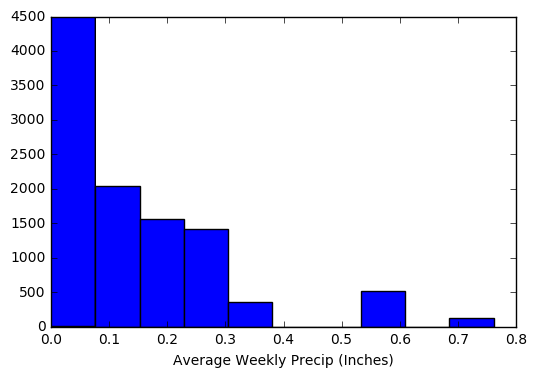

In [38]:
plt.hist(train['PavgW'])
plt.xlabel('Average Weekly Precip (Inches)')
plt.show()

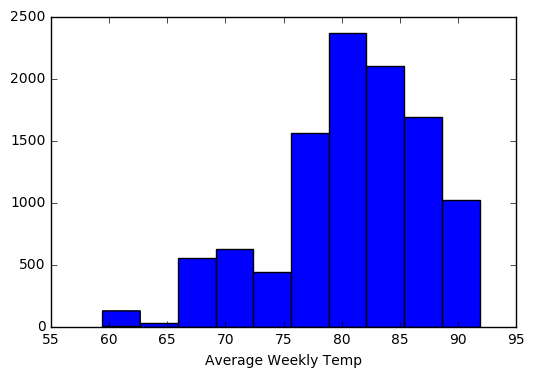

In [39]:
plt.hist(train['TmaxW'])
plt.xlabel('Average Weekly Temp')
plt.show()

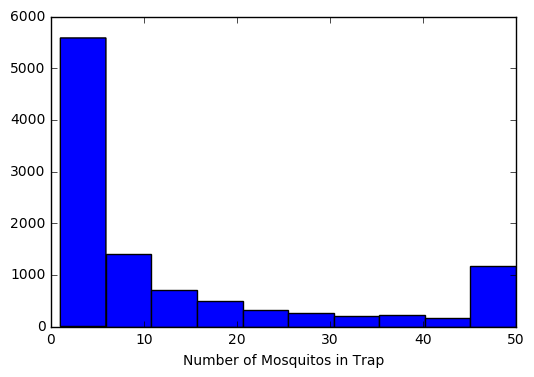

In [40]:
plt.hist(train['NumMosquitos'])
plt.xlabel('Number of Mosquitos in Trap')
plt.show()

# Model

In [41]:
data = train[['Trap','Date','Species','Latitude','Longitude','NumMosquitos','PavgW','TmaxW','WnvPresent']]

In [42]:
data.head(10)

Trap       Date                 Species   Latitude  Longitude  \
0  T002 2007-05-29  CULEX PIPIENS/RESTUANS  41.954690 -87.800991   
1  T002 2007-05-29          CULEX RESTUANS  41.954690 -87.800991   
2  T007 2007-05-29          CULEX RESTUANS  41.994991 -87.769279   
3  T015 2007-05-29  CULEX PIPIENS/RESTUANS  41.974089 -87.824812   
4  T015 2007-05-29          CULEX RESTUANS  41.974089 -87.824812   
5  T045 2007-05-29          CULEX RESTUANS  41.921600 -87.666455   
6  T046 2007-05-29          CULEX RESTUANS  41.891118 -87.654491   
7  T048 2007-05-29  CULEX PIPIENS/RESTUANS  41.867108 -87.654224   
8  T048 2007-05-29          CULEX RESTUANS  41.867108 -87.654224   
9  T049 2007-05-29          CULEX RESTUANS  41.896282 -87.655232   

   NumMosquitos     PavgW      TmaxW  WnvPresent  
0             1  0.035714  82.285714           0  
1             1  0.035714  82.285714           0  
2             1  0.035714  82.285714           0  
3             1  0.035714  82.285714           0  
4             4  0.035714  82.285714           0  
5             2  0.035714  82.285714           0  
6             1  0.035714  82.285714           0  
7             1  0.035714  82.285714           0  
8             2  0.035714  82.285714           0  
9             1  0.035714  82.285714           0

In [43]:
data.head()

Trap       Date                 Species   Latitude  Longitude  \
0  T002 2007-05-29  CULEX PIPIENS/RESTUANS  41.954690 -87.800991   
1  T002 2007-05-29          CULEX RESTUANS  41.954690 -87.800991   
2  T007 2007-05-29          CULEX RESTUANS  41.994991 -87.769279   
3  T015 2007-05-29  CULEX PIPIENS/RESTUANS  41.974089 -87.824812   
4  T015 2007-05-29          CULEX RESTUANS  41.974089 -87.824812   

   NumMosquitos     PavgW      TmaxW  WnvPresent  
0             1  0.035714  82.285714           0  
1             1  0.035714  82.285714           0  
2             1  0.035714  82.285714           0  
3             1  0.035714  82.285714           0  
4             4  0.035714  82.285714           0

In [44]:
dummies = pd.get_dummies(data, columns = ['Species'])

In [45]:
mask = (dummies['Trap'] == 'T903')
dummies[mask]

Trap       Date   Latitude  Longitude  NumMosquitos     PavgW  \
3975   T903 2009-06-03  41.957799 -87.930995            11  0.088571   
3976   T903 2009-06-03  41.957799 -87.930995             3  0.088571   
4053   T903 2009-06-05  41.957799 -87.930995             2  0.088571   
4178   T903 2009-06-15  41.957799 -87.930995             5  0.761429   
4313   T903 2009-06-22  41.957799 -87.930995            50  0.061429   
4314   T903 2009-06-22  41.957799 -87.930995            50  0.061429   
4315   T903 2009-06-22  41.957799 -87.930995            50  0.061429   
4316   T903 2009-06-22  41.957799 -87.930995            50  0.061429   
4317   T903 2009-06-22  41.957799 -87.930995            50  0.061429   
4318   T903 2009-06-22  41.957799 -87.930995            31  0.061429   
4319   T903 2009-06-22  41.957799 -87.930995            50  0.061429   
4320   T903 2009-06-22  41.957799 -87.930995            50  0.061429   
4321   T903 2009-06-22  41.957799 -87.930995            50  0.061429   
4322   T903 2009-06-22  41.957799 -87.930995            50  0.061429   
4323   T903 2009-06-22  41.957799 -87.930995            39  0.061429   
4447   T903 2009-06-29  41.957799 -87.930995             7  0.035714   
4721   T903 2009-07-13  41.957799 -87.930995            10  0.097143   
4722   T903 2009-07-13  41.957799 -87.930995            10  0.097143   
4723   T903 2009-07-13  41.957799 -87.930995             4  0.097143   
4875   T903 2009-07-17  41.957799 -87.930995            27  0.097143   
4876   T903 2009-07-17  41.957799 -87.930995             1  0.097143   
4877   T903 2009-07-17  41.957799 -87.930995             5  0.097143   
4878   T903 2009-07-17  41.957799 -87.930995             1  0.097143   
4879   T903 2009-07-17  41.957799 -87.930995             1  0.097143   
5054   T903 2009-07-27  41.957799 -87.930995            26  0.004286   
5055   T903 2009-07-27  41.957799 -87.930995            29  0.004286   
5056   T903 2009-07-27  41.957799 -87.930995            50  0.004286   
5057   T903 2009-07-27  41.957799 -87.930995             9  0.004286   
5058   T903 2009-07-27  41.957799 -87.930995             7  0.004286   
5059   T903 2009-07-27  41.957799 -87.930995             2  0.004286   
...     ...        ...        ...        ...           ...       ...   
7914   T903 2011-09-16  41.957799 -87.930995            23  0.072857   
7915   T903 2011-09-16  41.957799 -87.930995             1  0.072857   
7916   T903 2011-09-16  41.957799 -87.930995             3  0.072857   
7917   T903 2011-09-16  41.957799 -87.930995             6  0.072857   
7918   T903 2011-09-16  41.957799 -87.930995            31  0.072857   
7919   T903 2011-09-16  41.957799 -87.930995            16  0.072857   
8029   T903 2011-09-23  41.957799 -87.930995             2  0.065714   
8030   T903 2011-09-23  41.957799 -87.930995             6  0.065714   
8031   T903 2011-09-23  41.957799 -87.930995             1  0.065714   
8100   T903 2011-09-30  41.957799 -87.930995             1  0.348571   
8101   T903 2011-09-30  41.957799 -87.930995            21  0.348571   
8102   T903 2011-09-30  41.957799 -87.930995             6  0.348571   
8103   T903 2011-09-30  41.957799 -87.930995             3  0.348571   
8174   T903 2013-06-07  41.957799 -87.930995            10  0.024286   
8175   T903 2013-06-07  41.957799 -87.930995            22  0.024286   
8291   T903 2013-06-14  41.957799 -87.930995             9  0.168571   
8402   T903 2013-06-21  41.957799 -87.930995             2  0.242857   
8403   T903 2013-06-21  41.957799 -87.930995             8  0.242857   
8540   T903 2013-06-28  41.957799 -87.930995             9  0.372857   
8647   T903 2013-07-08  41.957799 -87.930995            27  0.071429   
8816   T903 2013-07-12  41.957799 -87.930995             6  0.071429   
8992   T903 2013-07-19  41.957799 -87.930995             2  0.105714   
9161   T903 2013-07-25  41.957799 -87.930995             6  0.060000   
9162   T903 2013-07-25  41.957799 -87.930995   

In [46]:
grouped_data = dummies.groupby(['Trap','Date','Latitude','Longitude','PavgW','TmaxW'], as_index = False).sum()

In [47]:
grouped_data.columns

Index(['Trap', 'Date', 'Latitude', 'Longitude', 'PavgW', 'TmaxW',
       'NumMosquitos', 'WnvPresent', 'Species_CULEX ERRATICUS',
       'Species_CULEX PIPIENS', 'Species_CULEX PIPIENS/RESTUANS',
       'Species_CULEX RESTUANS', 'Species_CULEX SALINARIUS',
       'Species_CULEX TARSALIS', 'Species_CULEX TERRITANS'],
      dtype='object')

In [48]:
for col in [u'Species_CULEX ERRATICUS',
       u'Species_CULEX PIPIENS', u'Species_CULEX PIPIENS/RESTUANS',
       u'Species_CULEX RESTUANS', u'Species_CULEX SALINARIUS',
       u'Species_CULEX TARSALIS', u'Species_CULEX TERRITANS']:
    grouped_data[col] = grouped_data[col].apply(lambda x: 0 if x == 0.0 else 1)

In [49]:
y = grouped_data.WnvPresent
X = grouped_data[[u'Latitude', u'Longitude', u'NumMosquitos', u'PavgW', u'TmaxW',
    u'Species_CULEX ERRATICUS', u'Species_CULEX PIPIENS',
       u'Species_CULEX PIPIENS/RESTUANS', u'Species_CULEX RESTUANS',
       u'Species_CULEX SALINARIUS', u'Species_CULEX TARSALIS',
       u'Species_CULEX TERRITANS']]

In [50]:
dummies.columns

Index(['Trap', 'Date', 'Latitude', 'Longitude', 'NumMosquitos', 'PavgW',
       'TmaxW', 'WnvPresent', 'Species_CULEX ERRATICUS',
       'Species_CULEX PIPIENS', 'Species_CULEX PIPIENS/RESTUANS',
       'Species_CULEX RESTUANS', 'Species_CULEX SALINARIUS',
       'Species_CULEX TARSALIS', 'Species_CULEX TERRITANS'],
      dtype='object')

In [51]:
dummies.to_csv('../datasets/train_clean.csv')

In [52]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.cross_validation import cross_val_score, train_test_split

//anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [53]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3)

In [54]:
X_train.head()

Latitude  Longitude  NumMosquitos     PavgW      TmaxW  \
2139  41.821582 -87.627796             3  0.761429  80.000000   
2172  41.803423 -87.642984             6  0.055714  79.428571   
2801  41.673408 -87.599862          3002  0.051429  83.000000   
2712  41.750498 -87.605294            12  0.081429  88.428571   
3211  41.932094 -87.700117             1  0.117143  76.857143   

      Species_CULEX ERRATICUS  Species_CULEX PIPIENS  \
2139                        0                      0   
2172                        0                      0   
2801                        0                      1   
2712                        0                      1   
3211                        0                      0   

      Species_CULEX PIPIENS/RESTUANS  Species_CULEX RESTUANS  \
2139                               0                       1   
2172                               1                       1   
2801                               1                       0   
2712                               0                       0   
3211                               0                       1   

      Species_CULEX SALINARIUS  Species_CULEX TARSALIS  \
2139                         0                       0   
2172                         0                       0   
2801                         1                       0   
2712                         0                       0   
3211                         0                       0   

      Species_CULEX TERRITANS  
2139                        0  
2172                        0  
2801                        1  
2712                        0  
3211                        0

In [55]:
logreg = LogisticRegressionCV(cv = 5)
logreg.fit(X_train,y_train)

//anaconda/lib/python3.5/site-packages/sklearn/model_selection/_split.py:581: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


LogisticRegressionCV(Cs=10, class_weight=None, cv=5, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [56]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [57]:
predictions = rfc.predict(X_test)

In [58]:
y_test.shape

(1385,)

In [59]:
scores = cross_val_score(rfc, X_train, y_train)

//anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:552: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=3.
  % (min_labels, self.n_folds)), Warning)


In [60]:
np.mean(scores)

0.91088670932677507

In [66]:
(train["PavgW"] > 0.2).map({True:1, False:0}).sum

0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26       0
27       0
28       0
29       0
        ..
10476    0
10477    0
10478    0
10479    0
10480    0
10481    0
10482    0
10483    0
10484    0
10485    0
10486    0
10487    0
10488    0
10489    0
10490    0
10491    0
10492    0
10493    0
10494    0
10495    0
10496    0
10497    0
10498    0
10499    0
10500    0
10501    0
10502    0
10503    0
10504    0
10505    0
Name: PavgW, dtype: int64